<a href="https://colab.research.google.com/github/saktheeswaranswan/-Mrityunjayam-Uttama-Villain-an-immortal-life-/blob/main/yolobeamfemfea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from math import sqrt, atan2, cos, sin, radians, degrees
from scipy.linalg import solve

# Constants
E_steel = 200 * 10**6  # kPa
L_deck = 12  # m
E = 115.654  # kN
H = 80.068  # kN

# Initialize u and F
u = np.arange(1, 26)
F = np.zeros(25)

# Tower shaft AC:
A_AC = 7.540 * 10**-3  # m^2
I_AC = 5.438 * 10**-5  # m^4
# Tower shaft BC:
A_BD = 1.814 * 10**-2
A_DC = A_BD  # m^2
I_BD = 3.367 * 10**-4
I_DC = I_BD  # m^4
# Cables
A_cab = 7.069 * 10**-4  # m^2
I_cab = 0
# Bridge deck
A_br = 1.232 * 10**-2  # m^2
I_br = 2.219 * 10**-4  # m^4

# Area
A = [A_AC, A_BD, A_BD, A_cab, A_cab, A_cab, A_cab, A_br, A_br, A_br, A_br]
# Inertia
I = [I_AC, I_BD, I_BD, I_cab, I_cab, I_cab, I_cab, I_br, I_br, I_br, I_br]

# Applied force vector
F[5] = -E
F[8] = -E
F[11] = -E
F[13] = H

# Lengths
L_AC = sqrt(7.0**2 + 1.0**2)
L_BD = sqrt(1.0**2 + 0.5**2)
L_DC = sqrt(6.0**2 + 3.0**2)
L_CE = sqrt(6.0**2 + 6.0**2)
L_CF = sqrt(9.0**2 + 6.0**2)
L_CG = sqrt(12.0**2 + 6.0**2)
L_CH = sqrt(15.0**2 + 6.0**2)
L_DE = 3
L_EF = 3
L_FG = 3
L_GH = 3
L = [L_AC, L_BD, L_DC, L_CE, L_CF, L_CG, L_CH, L_DE, L_EF, L_FG, L_GH]

# Theta
theta_AC = 180 - degrees(atan2(7.0, 1.0))
theta_BD = 180 - degrees(atan2(7.0, 3.5))
theta_DC = theta_BD
theta_DE = 0
theta_EF = theta_DE
theta_FG = theta_DE
theta_GH = theta_DE
theta_CE = 360 - degrees(atan2(6.0, 6.0))
theta_CF = 360 - degrees(atan2(6.0, 9.0))
theta_CG = 360 - degrees(atan2(6.0, 12.0))
theta_CH = 360 - degrees(atan2(6.0, 15.0))
theta = [theta_AC, theta_BD, theta_DC, theta_CE, theta_CF, theta_CG, theta_CH, theta_DE, theta_EF, theta_FG, theta_GH]

# ID_array
ID = [
    [u[18], u[19], u[20], u[15], u[16], u[17]],
    [u[21], u[22], u[23], u[0], u[1], u[2]],
    [u[0], u[1], u[2], u[15], u[16], u[17]],
    [u[15], u[16], u[17], u[4], u[5], u[6]],
    [u[15], u[16], u[17], u[7], u[8], u[9]],
    [u[15], u[16], u[17], u[10], u[11], u[12]],
    [u[15], u[16], u[17], u[13], u[24], u[14]],
    [u[0], u[1], u[3], u[4], u[5], u[6]],
    [u[4], u[5], u[6], u[7], u[8], u[9]],
    [u[7], u[8], u[9], u[10], u[11], u[12]],
    [u[10], u[11], u[12], u[13], u[24], u[14]]
]

# Initialize kff
kff = np.zeros((25, 25))

# Element calculations
for i in range(11):
    C = cos(radians(theta[i]))
    S = sin(radians(theta[i]))
    kele = np.zeros((6, 6))

    kbeam = [
        E * A[i] / L[i] * C**2 + 12 * E * I[i] / L[i]**3 * S**2,
        E * A[i] / L[i] * C * S - 12 * E * I[i] / L[i]**3 * C * S,
        -6 * E * I[i] / L[i]**2 * S,
        -E * A[i] / L[i] * C**2 - 12 * E * I[i] / L[i]**3 * S**2,
        -E * A[i] / L[i] * C * S + 12 * E * I[i] / L[i]**3 * C * S,
        -6 * E * I[i] / L[i]**2 * S,
        E * A[i] / L[i] * S**2 + 12 * E * I[i] / L[i]**3 * C**2,
        6 * E * I[i] / L[i]**2 * C,
        -E * A[i] / L[i] * C * S + 12 * E * I[i] / L[i]**3 * C * S,
        -E * A[i] / L[i] * S**2 - 12 * E * I[i] / L[i]**3 * C**2,
        6 * E * I[i] / L[i]**2 * C,
        4 * E * I[i] / L[i],
        -kbeam[2],
        -kbeam[7],
        2 * E * I[i] / L[i],
        kbeam[0],
        kbeam[1],
        -kbeam[2],
        -kbeam[9],
        -kbeam[7],
        kbeam[11]
    ]

    kele[0:6, 0] = kbeam[0:6]
    kele[1:6, 1] = kbeam[6:11]
    kele[2:6, 2] = kbeam[11:15]
    kele[3:6, 3] = kbeam[15:18]
    kele[4:6, 4] = kbeam[18:20]
    kele[5, 5] = kbeam[20]
    kele = np.triu(kele.T, 1) + np.tril(kele)

    array = ID[i]
    for n in range(6):
        for m in range(6):
            kff[array[n]-1, array[m]-1] += kele[n, m]

# Solve for xf
xf = solve(kff, F)
print(xf)


NameError: name 'kbeam' is not defined

In [2]:
!pip install numpy scipy


In [3]:
import numpy as np

# Constants
E_steel = 200 * 10**6  # kPa
L_deck = 12  # m
E = 115.654  # kN
H = 80.068  # kN

# Initialize arrays
u = np.arange(1, 26)  # Array from 1 to 25
F = np.zeros_like(u, dtype=float)  # Array of zeros with the same shape as u

# Tower shaft AC
A_AC = 7.540 * 10**-3  # m^2
I_AC = 5.438 * 10**-5  # m^4

# Tower shaft BC
A_BD = 1.814 * 10**-2  # m^2
A_DC = A_BD
I_BD = 3.367 * 10**-4  # m^4
I_DC = I_BD

# Cables
A_cab = 7.069 * 10**-4  # m^2
I_cab = 0

# Bridge deck
A_br = 1.232 * 10**-2  # m^2
I_br = 2.219 * 10**-4  # m^4

# Area and inertia arrays
A = [A_AC, A_BD, A_DC, A_cab, A_cab, A_cab, A_cab, A_br, A_br, A_br, A_br]
I = [I_AC, I_BD, I_DC, I_cab, I_cab, I_cab, I_cab, I_br, I_br, I_br, I_br]

# Applied force vector
F[5] = -E
F[8] = -E
F[11] = -E
F[13] = H

# Lengths
L_AC = np.sqrt(7.0**2 + 1.0**2)
L_BD = np.sqrt(1.0**2 + 0.5**2)
L_DC = np.sqrt(6.0**2 + 3.0**2)
L_CE = np.sqrt(6.0**2 + 6.0**2)
L_CF = np.sqrt(9.0**2 + 6.0**2)
L_CG = np.sqrt(12.0**2 + 6.0**2)
L_CH = np.sqrt(15.0**2 + 6.0**2)
L_DE = 3
L_EF = 3
L_FG = 3
L_GH = 3
L = [L_AC, L_BD, L_DC, L_CE, L_CF, L_CG, L_CH, L_DE, L_EF, L_FG, L_GH]

# Angles
theta_AC = 180 - np.degrees(np.arctan2(7.0, 1.0))
theta_BD = 180 - np.degrees(np.arctan2(7.0, 3.5))
theta_DC = theta_BD
theta_DE = 0
theta_EF = theta_DE
theta_FG = theta_DE
theta_GH = theta_DE
theta_CE = 360 - np.degrees(np.arctan2(6.0, 6.0))
theta_CF = 360 - np.degrees(np.arctan2(6.0, 9.0))
theta_CG = 360 - np.degrees(np.arctan2(6.0, 12.0))
theta_CH = 360 - np.degrees(np.arctan2(6.0, 15.0))
theta = [theta_AC, theta_BD, theta_DC, theta_CE, theta_CF, theta_CG, theta_CH, theta_DE, theta_EF, theta_FG, theta_GH]

# ID_array
ID_AC = [u[18], u[19], u[20], u[15], u[16], u[17]]
ID_CE = [u[15], u[16], u[17], u[4], u[5], u[6]]
ID_CF = [u[15], u[16], u[17], u[7], u[8], u[9]]
ID_CG = [u[15], u[16], u[17], u[10], u[11], u[12]]
ID_CH = [u[15], u[16], u[17], u[13], u[24], u[14]]
ID_DC = [u[0], u[1], u[2], u[15], u[16], u[17]]
ID_BD = [u[21], u[22], u[23], u[0], u[1], u[2]]
ID_DE = [u[0], u[1], u[3], u[4], u[5], u[6]]
ID_EF = [u[4], u[5], u[6], u[7], u[8], u[9]]
ID_FG = [u[7], u[8], u[9], u[10], u[11], u[12]]
ID_GH = [u[10], u[11], u[12], u[13], u[24], u[14]]
ID = [ID_AC, ID_BD, ID_DC, ID_CE, ID_CF, ID_CG, ID_CH, ID_DE, ID_EF, ID_FG, ID_GH]

# Stiffness matrix
kff = np.zeros((25, 25))

# Loop through elements
for i in range(11):
    C = np.cos(np.radians(theta[i]))
    S = np.sin(np.radians(theta[i]))

    # kbeam calculations
    kbeam = [
        E * A[i] / L[i] * C**2 + 12 * E * I[i] / L[i]**3 * S**2,
        E * A[i] / L[i] * C * S - 12 * E * I[i] / L[i]**3 * C * S,
        -6 * E * I[i] / L[i]**2 * S,
        -E * A[i] / L[i] * C**2 - 12 * E * I[i] / L[i]**3 * S**2,
        -E * A[i] / L[i] * C * S + 12 * E * I[i] / L[i]**3 * C * S,
        -6 * E * I[i] / L[i]**2 * S,
        E * A[i] / L[i] * S**2 + 12 * E * I[i] / L[i]**3 * C**2,
        6 * E * I[i] / L[i]**2 * C,
        -E * A[i] / L[i] * C * S + 12 * E * I[i] / L[i]**3 * C * S,
        -E * A[i] / L[i] * S**2 - 12 * E * I[i] / L[i]**3 * C**2,
        6 * E * I[i] / L[i]**2 * C,
        4 * E * I[i] / L[i],
        -kbeam[2],
        -kbeam[7],
        2 * E * I[i] / L[i]
    ]

    kele = np.zeros((6, 6))
    kele[np.triu_indices(6, 1)] = kbeam[:15]  # Upper triangle
    kele += kele.T  # Make it symmetric

    array = ID[i]
    for n in range(6):
        for m in range(6):
            kff[array[n] - 1, array[m] - 1] += kele[n, m]

# Solve for displacements
F = F.reshape(-1, 1)  # Reshape F to be a column vector
xf = np.linalg.solve(kff, F)

# Output displacements
print("Displacements (xf):")
print(xf)


NameError: name 'kbeam' is not defined

In [4]:
import numpy as np

# Constants
E_steel = 200 * 10**6  # kPa
L_deck = 12  # m
E = 115.654  # kN
H = 80.068  # kN

# Initialize arrays
u = np.arange(1, 26)  # Array from 1 to 25
F = np.zeros_like(u, dtype=float)  # Array of zeros with the same shape as u

# Tower shaft AC
A_AC = 7.540 * 10**-3  # m^2
I_AC = 5.438 * 10**-5  # m^4

# Tower shaft BC
A_BD = 1.814 * 10**-2  # m^2
A_DC = A_BD
I_BD = 3.367 * 10**-4  # m^4
I_DC = I_BD

# Cables
A_cab = 7.069 * 10**-4  # m^2
I_cab = 0

# Bridge deck
A_br = 1.232 * 10**-2  # m^2
I_br = 2.219 * 10**-4  # m^4

# Area and inertia arrays
A = [A_AC, A_BD, A_DC, A_cab, A_cab, A_cab, A_cab, A_br, A_br, A_br, A_br]
I = [I_AC, I_BD, I_DC, I_cab, I_cab, I_cab, I_cab, I_br, I_br, I_br, I_br]

# Applied force vector
F[5] = -E
F[8] = -E
F[11] = -E
F[13] = H

# Lengths
L_AC = np.sqrt(7.0**2 + 1.0**2)
L_BD = np.sqrt(1.0**2 + 0.5**2)
L_DC = np.sqrt(6.0**2 + 3.0**2)
L_CE = np.sqrt(6.0**2 + 6.0**2)
L_CF = np.sqrt(9.0**2 + 6.0**2)
L_CG = np.sqrt(12.0**2 + 6.0**2)
L_CH = np.sqrt(15.0**2 + 6.0**2)
L_DE = 3
L_EF = 3
L_FG = 3
L_GH = 3
L = [L_AC, L_BD, L_DC, L_CE, L_CF, L_CG, L_CH, L_DE, L_EF, L_FG, L_GH]

# Angles
theta_AC = 180 - np.degrees(np.arctan2(7.0, 1.0))
theta_BD = 180 - np.degrees(np.arctan2(7.0, 3.5))
theta_DC = theta_BD
theta_DE = 0
theta_EF = theta_DE
theta_FG = theta_DE
theta_GH = theta_DE
theta_CE = 360 - np.degrees(np.arctan2(6.0, 6.0))
theta_CF = 360 - np.degrees(np.arctan2(6.0, 9.0))
theta_CG = 360 - np.degrees(np.arctan2(6.0, 12.0))
theta_CH = 360 - np.degrees(np.arctan2(6.0, 15.0))
theta = [theta_AC, theta_BD, theta_DC, theta_CE, theta_CF, theta_CG, theta_CH, theta_DE, theta_EF, theta_FG, theta_GH]

# ID_array
ID_AC = [u[18], u[19], u[20], u[15], u[16], u[17]]
ID_CE = [u[15], u[16], u[17], u[4], u[5], u[6]]
ID_CF = [u[15], u[16], u[17], u[7], u[8], u[9]]
ID_CG = [u[15], u[16], u[17], u[10], u[11], u[12]]
ID_CH = [u[15], u[16], u[17], u[13], u[24], u[14]]
ID_DC = [u[0], u[1], u[2], u[15], u[16], u[17]]
ID_BD = [u[21], u[22], u[23], u[0], u[1], u[2]]
ID_DE = [u[0], u[1], u[3], u[4], u[5], u[6]]
ID_EF = [u[4], u[5], u[6], u[7], u[8], u[9]]
ID_FG = [u[7], u[8], u[9], u[10], u[11], u[12]]
ID_GH = [u[10], u[11], u[12], u[13], u[24], u[14]]
ID = [ID_AC, ID_BD, ID_DC, ID_CE, ID_CF, ID_CG, ID_CH, ID_DE, ID_EF, ID_FG, ID_GH]

# Stiffness matrix
kff = np.zeros((25, 25))

# Loop through elements
for i in range(11):
    C = np.cos(np.radians(theta[i]))
    S = np.sin(np.radians(theta[i]))

    # Initialize kbeam as a list with all elements set to 0
    kbeam = [0] * 22

    # kbeam calculations
    kbeam[0] = E * A[i] / L[i] * C**2 + 12 * E * I[i] / L[i]**3 * S**2
    kbeam[1] = E * A[i] / L[i] * C * S - 12 * E * I[i] / L[i]**3 * C * S
    kbeam[2] = -6 * E * I[i] / L[i]**2 * S
    kbeam[3] = -E * A[i] / L[i] * C**2 - 12 * E * I[i] / L[i]**3 * S**2
    kbeam[4] = -E * A[i] / L[i] * C * S + 12 * E * I[i] / L[i]**3 * C * S
    kbeam[5] = -6 * E * I[i] / L[i]**2 * S
    kbeam[6] = E * A[i] / L[i] * S**2 + 12 * E * I[i] / L[i]**3 * C**2
    kbeam[7] = 6 * E * I[i] / L[i]**2 * C
    kbeam[8] = -E * A[i] / L[i] * C * S + 12 * E * I[i] / L[i]**3 * C * S
    kbeam[9] = -E * A[i] / L[i] * S**2 - 12 * E * I[i] / L[i]**3 * C**2
    kbeam[10] = 6 * E * I[i] / L[i]**2 * C
    kbeam[11] = 4 * E * I[i] / L[i]
    kbeam[12] = -kbeam[2]
    kbeam[13] = -kbeam[7]
    kbeam[14] = 2 * E * I[i] / L[i]

    kele = np.zeros((6, 6))
    kele[np.triu_indices(6, 1)] = kbeam[:15]  # Fill the upper triangle
    kele += kele.T  # Make it symmetric

    array = ID[i]
    for n in range(6):
        for m in range(6):
            kff[array[n] - 1, array[m] - 1] += kele[n, m]

# Solve for displacements
F = F.reshape(-1, 1)  # Reshape F to be a column vector
xf = np.linalg.solve(kff, F)

# Output displacements
print("Displacements (xf):")
print(xf)


Displacements (xf):
[[  133.05977471]
 [   17.49005662]
 [  304.47665062]
 [-6327.97117535]
 [  171.68492954]
 [-3294.8961621 ]
 [ 1704.6763909 ]
 [ -148.92569849]
 [-3032.68147131]
 [ 7403.27178439]
 [ -350.17682824]
 [-3336.76995872]
 [ -249.67113646]
 [-2495.19083259]
 [-6049.18352056]
 [  334.81456988]
 [14756.58868971]
 [-2125.22738358]
 [-2480.22833028]
 [-9174.3515304 ]
 [-5854.8365221 ]
 [ -410.64209191]
 [  512.10421223]
 [  783.82944949]
 [-3535.07782152]]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

E=200e9 #Young's modulus
rho=7800. #density
L=1. #total length
b=0.010 #beam depth
h=0.005 #beam height
A=b*h #beam cross sectional area
I=b*h**3/12 #beam moment of inertia
N=40 #number of elements
Nnodes=N+1 #number of nodes
ell=L/N #length of beam element
Nmodes=12 #number of modes to keep
mass=rho*L*A #total mass
Irot=1/12*mass*L**2 #rotary inertia
x=np.arange(0,ell+L,ell)


K_e=E*I/ell**3*np.array([[12, 6*ell, -12, 6*ell],
 [6*ell, 4*ell**2, -6*ell, 2*ell**2],
 [-12, -6*ell, 12, -6*ell], #x2
 [6*ell, 2*ell**2, -6*ell, 4*ell**2]]) #theta2


bcs = 'clamped-clamped' # 'clamped-clamped' # 'clamped-sliding' # simplysupported # 'cantilever' Input boundary conditions here

loadcase = 'uniformpres' #'pointforce' # 'pointmoment' # 'unifromdistribmoment' Input load case here
 # 'uniformpres' # 'concmomenteachnode'


K=np.zeros((2*(N+1),2*(N+1)))
# M=zeros(2*(N+1),2*(N+1))


for i in range(1,N+1):
 K[(2*(i-1)+1-1):(2*(i-1)+4), (2*(i-1)+1-1):(2*(i-1)+4)]=K[(2*(i-1)+1-1):(2*(i-1)+4)][:,(2*(i-1)+1-1):(2*(i-1)+4)]+K_e

f=np.zeros((2*Nnodes,1))

if loadcase == 'pointforce':
 print('Load: concentrated force at x=L/2')
 #load: concentrated force on center of beam
 f[Nnodes-1]=1
elif loadcase == 'pointmoment':
 print('Load: concentrated moment at x=L/2')
 #load: concentrated moment on center of beam
 f[Nnodes]=1
elif loadcase == 'uniformdistribmoment':
 print('Load: uniformly distributed moment')
 #load: uniform distributed moment on entire beam
 m=1.0
 m_el=np.zeros((4,1))
 m_el[:,0] = np.array([-m,0,m,0])
 for i in range(1,N+1):
 f[2*(i-1)+1-1:2*(i-1)+4]=f[2*(i-1)+1-1:2*(i-1)+4]+m_el
elif loadcase == 'concmomenteachnode':
 print('Load: Concentrated moment on each node')
 #load: concentrated moment on each node
 f[1:2*Nnodes:2]=1
elif loadcase == 'uniformpres':
 print('Uniform pressure')
 #load: uniform distributed load on entire beam
 q=-rho*A*9.81
 q_el=np.zeros((4,1))
 q_el[:,0] = np.array([q*ell/2, q*ell**2/12, q*ell/2, -q*ell**2/12])
 for i in range(1,N+1):
 f[2*(i-1)+1-1:2*(i-1)+4]=f[2*(i-1)+1-1:2*(i-1)+4]+q_el
else:
 print('Unknown loading')

if bcs == 'clamped-clamped':
 print('BCs: clamped-clamped')
 #clamped-clamped beam BCs
 K=np.delete(K,[2*Nnodes-2,2*Nnodes-1],0) #K[1:2,:]=[]
 K=np.delete(K,[2*Nnodes-2,2*Nnodes-1],1) #K[:,1:2]=[]
 f=np.delete(f,[2*Nnodes-2,2*Nnodes-1]) #f[1:2]=[]
 K=np.delete(K,[0,1],0) #K[1:2,:]=[]
 K=np.delete(K,[0,1],1) #K[:,1:2]=[]
 f=np.delete(f,[0,1]) #f[1:2]=[]

elif bcs == 'simplysupported':
 print('BCs: simply supported')
 #simply supported beam BCs
 K=np.delete(K,[2*Nnodes-2],0) #K[1:2,:]=[]
 K=np.delete(K,[2*Nnodes-2],1) #K[:,1:2]=[]
 f=np.delete(f,[2*Nnodes-2]) #f[1:2]=[]
 K=np.delete(K,[0],0) #K[1:2,:]=[]
 K=np.delete(K,[0],1) #K[1:2,:]=[]
 f=np.delete(f,[0]) #f[1:2]=[]

elif bcs == 'cantilever':
 print('BCs: cantilever')
 #cantilever beam BCs
 K=np.delete(K,[0,1],0) #K[1:2,:]=[]
 K=np.delete(K,[0,1],1) #K[:,1:2]=[]
 f=np.delete(f,[0,1]) #f[1:2]=[]

elif bcs == 'clamped-sliding':
 print('BCs: clamped-sliding')
 #clamped-sliding beam BCs
 K=np.delete(K,[2*Nnodes-1],0) #K[1:2,:]=[]
 K=np.delete(K,[2*Nnodes-1],1) #K[:,1:2]=[]
 f=np.delete(f,[2*Nnodes-1]) #f[1:2]=[]
 K=np.delete(K,[0,1],0) #K[1:2,:]=[]
 K=np.delete(K,[0,1],1) #K[:,1:2]=[]
 f=np.delete(f,[0,1]) #f[1:2]=[]
else:
 print('Unknown boundary conditions.')

dx_vec=np.linalg.solve(K,f)

if bcs == 'clamped-clamped':
 print('BCs output: clamped-clamped')
 #clamped-clamped
 dx=np.hstack([0., dx_vec[0:2*Nnodes-5:2], 0.])
 dtheta=np.hstack([0., dx_vec[1:2*Nnodes-4:2], 0.])
elif bcs == 'simplysupported':
 print('BCs output: simply-supported')
 #simply-supported
 dx=np.hstack([0., dx_vec[1:2*Nnodes-4:2], 0.])
 dtheta=np.hstack([dx_vec[0:2*Nnodes-3:2], dx_vec[2*Nnodes-3]])
elif bcs == 'cantilever':
 print('BCs output: cantilever')
 #cantilever
 dx=np.hstack([0., dx_vec[0:2*Nnodes-2:2]])
 dtheta=np.hstack([0., dx_vec[1:2*Nnodes-1:2]])
elif bcs == 'clamped-sliding':
 print('BCs output: clamped-sliding')
 #clamped-sliding beam BCs
 dx=np.hstack([0., dx_vec[0:2*Nnodes-3:2]])
 dtheta=np.hstack([0., dx_vec[1:2*Nnodes-4:2], 0.])
else:
 print('Output: Unknown boundary conditions.')

plt.figure(1)
plt.subplot(211)
plt.plot(x,dx)
plt.ylabel('displacement [m]')
#plt.title(['BCs: ' bcs 'Load case: ' loadcase])
plt.show()

plt.subplot(212)
plt.plot(x,dtheta)
plt.ylabel('slope [radians]')
plt.xlabel('X [m]')

IndentationError: expected an indented block after 'for' statement on line 55 (<ipython-input-5-65d031fb8599>, line 56)

In [6]:
import numpy as np

# Constants
E_steel = 200e6  # kPa
L_deck = 12  # m
E = 115.654  # kN
H = 80.068  # kN

# Initialize arrays
u = np.arange(1, 26)  # u values from 1 to 25
F = np.zeros(25)

# Tower shaft properties
A_AC = 7.540e-3  # m^2
I_AC = 5.438e-5  # m^4

# Tower shaft BD and DC properties
A_BD = 1.814e-2  # m^2
I_BD = 3.367e-4  # m^4
A_DC = A_BD
I_DC = I_BD

# Cable properties
A_cab = 7.069e-4  # m^2
I_cab = 0

# Bridge deck properties
A_br = 1.232e-2  # m^2
I_br = 2.219e-4  # m^4

# Area array
A = np.array([A_AC, A_BD, A_BD, A_cab, A_cab, A_cab, A_cab, A_br, A_br, A_br, A_br])

# Inertia array
I = np.array([I_AC, I_BD, I_BD, I_cab, I_cab, I_cab, I_cab, I_br, I_br, I_br, I_br])

# Applied force vector
F[5] = -E
F[8] = -E
F[11] = -E
F[13] = H

# Length array
L = np.array([
    np.sqrt(7.0**2 + 1.0**2),
    np.sqrt(1.0**2 + 0.5**2),
    np.sqrt(6.0**2 + 3.0**2),
    np.sqrt(6.0**2 + 6.0**2),
    np.sqrt(9.0**2 + 6.0**2),
    np.sqrt(12.0**2 + 6.0**2),
    np.sqrt(15.0**2 + 6.0**2),
    3, 3, 3, 3
])

# Theta values
theta = np.array([
    180 - np.degrees(np.arctan2(7.0, 1.0)),
    180 - np.degrees(np.arctan2(7.0, 3.5)),
    180 - np.degrees(np.arctan2(7.0, 3.5)),
    360 - np.degrees(np.arctan2(6.0, 6.0)),
    360 - np.degrees(np.arctan2(6.0, 9.0)),
    360 - np.degrees(np.arctan2(6.0, 12.0)),
    360 - np.degrees(np.arctan2(6.0, 15.0)),
    0, 0, 0, 0
])

# ID array
ID_AC = [u[18], u[19], u[20], u[15], u[16], u[17]]
ID_BD = [u[21], u[22], u[23], u[0], u[1], u[2]]
ID_DC = [u[0], u[1], u[2], u[15], u[16], u[17]]
ID_CE = [u[15], u[16], u[17], u[4], u[5], u[6]]
ID_CF = [u[15], u[16], u[17], u[7], u[8], u[9]]
ID_CG = [u[15], u[16], u[17], u[10], u[11], u[12]]
ID_CH = [u[15], u[16], u[17], u[13], u[24], u[14]]
ID_DE = [u[0], u[1], u[3], u[4], u[5], u[6]]
ID_EF = [u[4], u[5], u[6], u[7], u[8], u[9]]
ID_FG = [u[7], u[8], u[9], u[10], u[11], u[12]]
ID_GH = [u[10], u[11], u[12], u[13], u[24], u[14]]

ID = [ID_AC, ID_BD, ID_DC, ID_CE, ID_CF, ID_CG, ID_CH, ID_DE, ID_EF, ID_FG, ID_GH]

# Initialize stiffness matrix
kff = np.zeros((25, 25))

# Loop through elements and calculate stiffness
for i in range(11):
    C = np.cos(np.radians(theta[i]))
    S = np.sin(np.radians(theta[i]))
    kbeam = [
        E * A[i] / L[i] * C**2 + 12 * E * I[i] / L[i]**3 * S**2,
        E * A[i] / L[i] * C * S - 12 * E * I[i] / L[i]**3 * C * S,
        -6 * E * I[i] / L[i]**2 * S,
        -E * A[i] / L[i] * C**2 - 12 * E * I[i] / L[i]**3 * S**2,
        -E * A[i] / L[i] * C * S + 12 * E * I[i] / L[i]**3 * C * S,
        -6 * E * I[i] / L[i]**2 * S,
        E * A[i] / L[i] * S**2 + 12 * E * I[i] / L[i]**3 * C**2,
        6 * E * I[i] / L[i]**2 * C,
        -E * A[i] / L[i] * C * S + 12 * E * I[i] / L[i]**3 * C * S,
        -E * A[i] / L[i] * S**2 - 12 * E * I[i] / L[i]**3 * C**2,
        6 * E * I[i] / L[i]**2 * C,
        4 * E * I[i] / L[i],
        -kbeam[2],
        -kbeam[7],
        2 * E * I[i] / L[i],
    ]

    kele = np.zeros((6, 6))
    kele[0, :] = kbeam[:6]
    kele[1, 1:] = kbeam[6:11]
    kele[2, 2:] = kbeam[11:15]
    kele[3, 3:] = kbeam[15:18]
    kele[4, 4:] = kbeam[18:20]
    kele[5, 5] = kbeam[20]

    kele = kele + kele.T - np.diag(np.diag(kele))  # Symmetric matrix

    array = ID[i]
    for n in range(6):
        for m in range(6):
            kff[array[n], array[m]] += kele[n, m]

# Solve for displacements
F = F.reshape(-1, 1)
xf = np.linalg.solve(kff, F)

# Calculate shear force and bending moment
# (You would need to add logic here based on your specific requirements)

print("Displacements (xf):", xf)


ValueError: could not broadcast input array from shape (0,) into shape (3,)

Uniform pressure
BCs: clamped-clamped


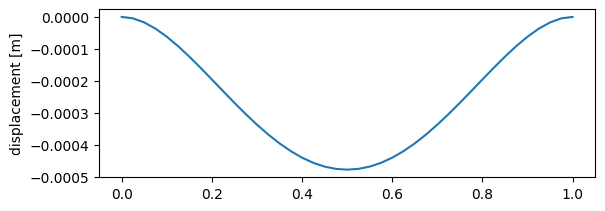

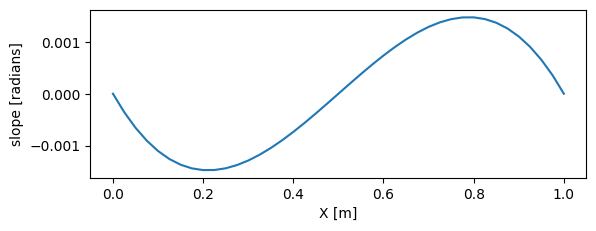

In [7]:
import matplotlib.pyplot as plt
import numpy as np

E = 200e9  # Young's modulus
rho = 7800.  # density
L = 1.  # total length
b = 0.010  # beam depth
h = 0.005  # beam height
A = b * h  # beam cross-sectional area
I = b * h**3 / 12  # beam moment of inertia
N = 40  # number of elements
Nnodes = N + 1  # number of nodes
ell = L / N  # length of beam element
Nmodes = 12  # number of modes to keep
mass = rho * L * A  # total mass
Irot = 1 / 12 * mass * L**2  # rotary inertia
x = np.arange(0, ell + L, ell)

K_e = E * I / ell**3 * np.array([
    [12, 6 * ell, -12, 6 * ell],
    [6 * ell, 4 * ell**2, -6 * ell, 2 * ell**2],
    [-12, -6 * ell, 12, -6 * ell],
    [6 * ell, 2 * ell**2, -6 * ell, 4 * ell**2]
])

bcs = 'clamped-clamped'  # boundary conditions: 'clamped-clamped', 'clamped-sliding', 'simplysupported', 'cantilever'

loadcase = 'uniformpres'  # load case: 'pointforce', 'pointmoment', 'uniformdistribmoment', 'uniformpres', 'concmomenteachnode'

K = np.zeros((2 * (N + 1), 2 * (N + 1)))
f = np.zeros((2 * Nnodes, 1))

for i in range(1, N + 1):
    K[(2 * (i - 1)):(2 * (i - 1) + 4), (2 * (i - 1)):(2 * (i - 1) + 4)] += K_e

if loadcase == 'pointforce':
    print('Load: concentrated force at x=L/2')
    f[Nnodes - 1] = 1
elif loadcase == 'pointmoment':
    print('Load: concentrated moment at x=L/2')
    f[Nnodes] = 1
elif loadcase == 'uniformdistribmoment':
    print('Load: uniformly distributed moment')
    m = 1.0
    m_el = np.array([-m, 0, m, 0]).reshape((4, 1))
    for i in range(1, N + 1):
        f[2 * (i - 1):2 * (i - 1) + 4] += m_el
elif loadcase == 'concmomenteachnode':
    print('Load: Concentrated moment on each node')
    f[1:2 * Nnodes:2] = 1
elif loadcase == 'uniformpres':
    print('Uniform pressure')
    q = -rho * A * 9.81
    q_el = np.array([q * ell / 2, q * ell**2 / 12, q * ell / 2, -q * ell**2 / 12]).reshape((4, 1))
    for i in range(1, N + 1):
        f[2 * (i - 1):2 * (i - 1) + 4] += q_el
else:
    print('Unknown loading')

if bcs == 'clamped-clamped':
    print('BCs: clamped-clamped')
    K = np.delete(K, [2 * Nnodes - 2, 2 * Nnodes - 1], 0)
    K = np.delete(K, [2 * Nnodes - 2, 2 * Nnodes - 1], 1)
    f = np.delete(f, [2 * Nnodes - 2, 2 * Nnodes - 1])
    K = np.delete(K, [0, 1], 0)
    K = np.delete(K, [0, 1], 1)
    f = np.delete(f, [0, 1])
elif bcs == 'simplysupported':
    print('BCs: simply supported')
    K = np.delete(K, [2 * Nnodes - 2], 0)
    K = np.delete(K, [2 * Nnodes - 2], 1)
    f = np.delete(f, [2 * Nnodes - 2])
    K = np.delete(K, [0], 0)
    K = np.delete(K, [0], 1)
    f = np.delete(f, [0])
elif bcs == 'cantilever':
    print('BCs: cantilever')
    K = np.delete(K, [0, 1], 0)
    K = np.delete(K, [0, 1], 1)
    f = np.delete(f, [0, 1])
elif bcs == 'clamped-sliding':
    print('BCs: clamped-sliding')
    K = np.delete(K, [2 * Nnodes - 1], 0)
    K = np.delete(K, [2 * Nnodes - 1], 1)
    f = np.delete(f, [2 * Nnodes - 1])
    K = np.delete(K, [0, 1], 0)
    K = np.delete(K, [0, 1], 1)
    f = np.delete(f, [0, 1])
else:
    print('Unknown boundary conditions.')

dx_vec = np.linalg.solve(K, f)

if bcs == 'clamped-clamped':
    dx = np.hstack([0., dx_vec[0:2 * Nnodes - 5:2], 0.])
    dtheta = np.hstack([0., dx_vec[1:2 * Nnodes - 4:2], 0.])
elif bcs == 'simplysupported':
    dx = np.hstack([0., dx_vec[1:2 * Nnodes - 4:2], 0.])
    dtheta = np.hstack([dx_vec[0:2 * Nnodes - 3:2], dx_vec[2 * Nnodes - 3]])
elif bcs == 'cantilever':
    dx = np.hstack([0., dx_vec[0:2 * Nnodes - 2:2]])
    dtheta = np.hstack([0., dx_vec[1:2 * Nnodes - 1:2]])
elif bcs == 'clamped-sliding':
    dx = np.hstack([0., dx_vec[0:2 * Nnodes - 3:2]])
    dtheta = np.hstack([0., dx_vec[1:2 * Nnodes - 4:2], 0.])
else:
    print('Output: Unknown boundary conditions.')

plt.figure(1)
plt.subplot(211)
plt.plot(x, dx)
plt.ylabel('displacement [m]')
plt.show()

plt.subplot(212)
plt.plot(x, dtheta)
plt.ylabel('slope [radians]')
plt.xlabel('X [m]')
plt.show()


Uniform pressure
BCs: simply supported


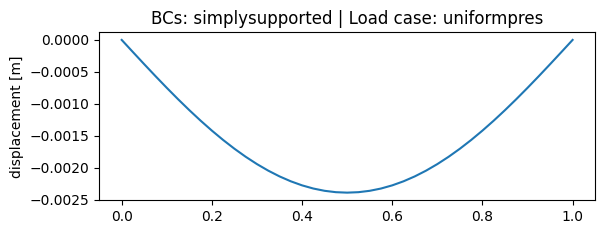

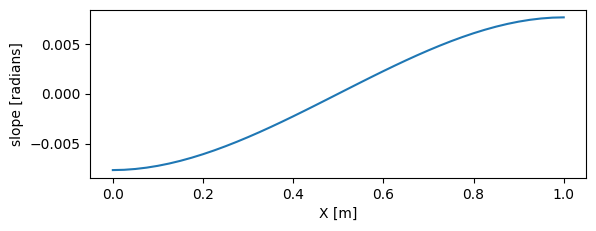

In [8]:
import matplotlib.pyplot as plt
import numpy as np

E = 200e9  # Young's modulus
rho = 7800.  # density
L = 1.  # total length
b = 0.010  # beam depth
h = 0.005  # beam height
A = b * h  # beam cross-sectional area
I = b * h**3 / 12  # beam moment of inertia
N = 40  # number of elements
Nnodes = N + 1  # number of nodes
ell = L / N  # length of beam element
Nmodes = 12  # number of modes to keep
mass = rho * L * A  # total mass
Irot = 1 / 12 * mass * L**2  # rotary inertia
x = np.arange(0, ell + L, ell)

K_e = E * I / ell**3 * np.array([
    [12, 6 * ell, -12, 6 * ell],
    [6 * ell, 4 * ell**2, -6 * ell, 2 * ell**2],
    [-12, -6 * ell, 12, -6 * ell],
    [6 * ell, 2 * ell**2, -6 * ell, 4 * ell**2]
])

bcs = 'simplysupported'  # change boundary conditions to 'simplysupported'

loadcase = 'uniformpres'  # load case: 'pointforce', 'pointmoment', 'uniformdistribmoment', 'uniformpres', 'concmomenteachnode'

K = np.zeros((2 * (N + 1), 2 * (N + 1)))
f = np.zeros((2 * Nnodes, 1))

for i in range(1, N + 1):
    K[(2 * (i - 1)):(2 * (i - 1) + 4), (2 * (i - 1)):(2 * (i - 1) + 4)] += K_e

if loadcase == 'pointforce':
    print('Load: concentrated force at x=L/2')
    f[Nnodes - 1] = 1
elif loadcase == 'pointmoment':
    print('Load: concentrated moment at x=L/2')
    f[Nnodes] = 1
elif loadcase == 'uniformdistribmoment':
    print('Load: uniformly distributed moment')
    m = 1.0
    m_el = np.array([-m, 0, m, 0]).reshape((4, 1))
    for i in range(1, N + 1):
        f[2 * (i - 1):2 * (i - 1) + 4] += m_el
elif loadcase == 'concmomenteachnode':
    print('Load: Concentrated moment on each node')
    f[1:2 * Nnodes:2] = 1
elif loadcase == 'uniformpres':
    print('Uniform pressure')
    q = -rho * A * 9.81
    q_el = np.array([q * ell / 2, q * ell**2 / 12, q * ell / 2, -q * ell**2 / 12]).reshape((4, 1))
    for i in range(1, N + 1):
        f[2 * (i - 1):2 * (i - 1) + 4] += q_el
else:
    print('Unknown loading')

if bcs == 'simplysupported':
    print('BCs: simply supported')
    K = np.delete(K, [2 * Nnodes - 2], 0)
    K = np.delete(K, [2 * Nnodes - 2], 1)
    f = np.delete(f, [2 * Nnodes - 2])
    K = np.delete(K, [0], 0)
    K = np.delete(K, [0], 1)
    f = np.delete(f, [0])
else:
    print('Unknown boundary conditions.')

dx_vec = np.linalg.solve(K, f)

if bcs == 'simplysupported':
    dx = np.hstack([0., dx_vec[1:2 * Nnodes - 4:2], 0.])
    dtheta = np.hstack([dx_vec[0:2 * Nnodes - 3:2], dx_vec[2 * Nnodes - 3]])

plt.figure(1)
plt.subplot(211)
plt.plot(x, dx)
plt.ylabel('displacement [m]')
plt.title(f'BCs: {bcs} | Load case: {loadcase}')
plt.show()

plt.subplot(212)
plt.plot(x, dtheta)
plt.ylabel('slope [radians]')
plt.xlabel('X [m]')
plt.show()
